In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


deaths_df = pd.read_csv(r"C:\Users\User\Downloads\cholera-deaths\death.csv")
pumps_df  = pd.read_csv(r"C:\Users\User\Downloads\cholera-deaths\Pumps.csv")

print("Deaths:")
print(deaths_df.head())
print("\nPumps:")
print(pumps_df.head())


Deaths:
   Id  Count        POINT_X        POINT_Y
0   0      3  529308.741420  181031.351546
1   0      2  529312.163571  181025.172401
2   0      1  529314.382429  181020.293688
3   0      1  529317.379645  181014.258771
4   0      4  529320.675449  181007.871628

Pumps:
   Id        POINT_X        POINT_Y
0   1  529396.539395  181025.063047
1   2  529192.537868  181079.391380
2   3  529183.739766  181193.735013
3   4  529748.911089  180924.207251
4   5  529613.205238  180896.804121


In [3]:

deaths_gdf = gpd.GeoDataFrame(
    deaths_df,
    geometry=gpd.points_from_xy(deaths_df["POINT_X"], deaths_df["POINT_Y"]),
    crs="EPSG:4326"  
)

pumps_gdf = gpd.GeoDataFrame(
    pumps_df,
    geometry=gpd.points_from_xy(pumps_df["POINT_X"], pumps_df["POINT_Y"]),
    crs="EPSG:4326"
)

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


deaths_df = pd.read_csv(r"C:\Users\User\Downloads\cholera-deaths\death.csv")
pumps_df  = pd.read_csv(r"C:\Users\User\Downloads\cholera-deaths\Pumps.csv")


deaths_gdf = gpd.GeoDataFrame(
    deaths_df,
    geometry=gpd.points_from_xy(deaths_df["POINT_X"], deaths_df["POINT_Y"]),
    crs=None   
)

pumps_gdf = gpd.GeoDataFrame(
    pumps_df,
    geometry=gpd.points_from_xy(pumps_df["POINT_X"], pumps_df["POINT_Y"]),
    crs=None
)

print("Check geometry deaths:", deaths_gdf.geometry.head())
print("Check geometry pumps :", pumps_gdf.geometry.head())
print("Total bounds pumps   :", pumps_gdf.total_bounds)


Check geometry deaths: 0    POINT (529308.741 181031.352)
1    POINT (529312.164 181025.172)
2    POINT (529314.382 181020.294)
3     POINT (529317.38 181014.259)
4    POINT (529320.675 181007.872)
Name: geometry, dtype: geometry
Check geometry pumps : 0    POINT (529396.539 181025.063)
1    POINT (529192.538 181079.391)
2     POINT (529183.74 181193.735)
3    POINT (529748.911 180924.207)
4    POINT (529613.205 180896.804)
Name: geometry, dtype: geometry
Total bounds pumps   : [529183.739766 180660.454749 529748.911089 181193.735013]


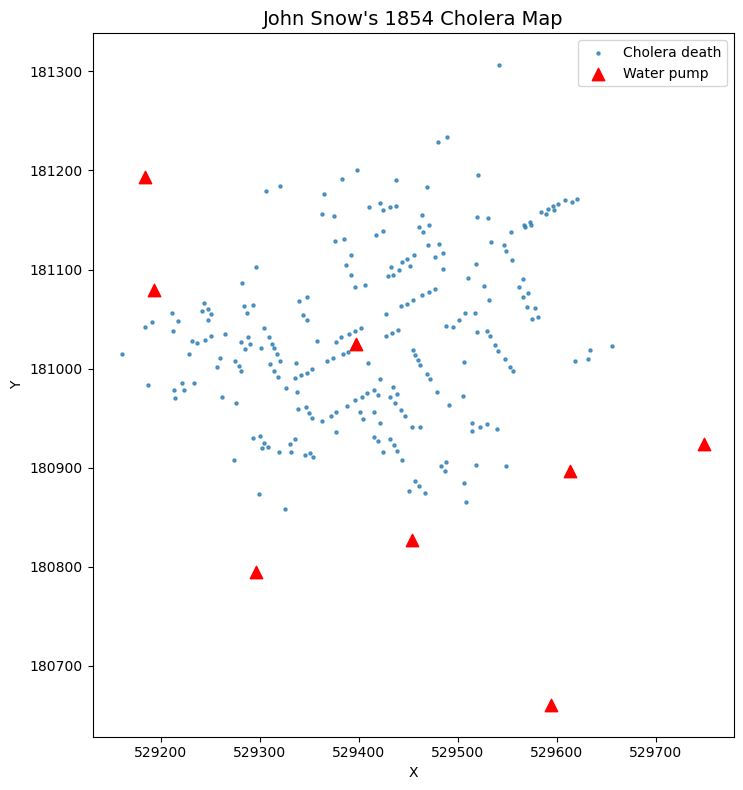

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

# death
deaths_gdf.plot(
    ax=ax,
    markersize=5,
    alpha=0.7,
    label="Cholera death"
)

# pump
pumps_gdf.plot(
    ax=ax,
    marker="^",
    color="red",
    markersize=80,
    label="Water pump"
)

ax.set_title("John Snow's 1854 Cholera Map", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()


ax.set_aspect("equal")

plt.tight_layout()
plt.show()


In [11]:
import geopandas as gpd


deaths_gdf = gpd.GeoDataFrame(
    deaths_df,
    geometry=gpd.points_from_xy(deaths_df["POINT_X"], deaths_df["POINT_Y"]),
    crs="EPSG:27700"
)

pumps_gdf = gpd.GeoDataFrame(
    pumps_df,
    geometry=gpd.points_from_xy(pumps_df["POINT_X"], pumps_df["POINT_Y"]),
    crs="EPSG:27700"
)


deaths_wgs = deaths_gdf.to_crs(epsg=4326)
pumps_wgs  = pumps_gdf.to_crs(epsg=4326)

print(deaths_wgs.head())
print(pumps_wgs.head())

   Id  Count        POINT_X        POINT_Y                   geometry
0   0      3  529308.741420  181031.351546  POINT (-0.13793 51.51342)
1   0      2  529312.163571  181025.172401  POINT (-0.13788 51.51336)
2   0      1  529314.382429  181020.293688  POINT (-0.13785 51.51332)
3   0      1  529317.379645  181014.258771  POINT (-0.13781 51.51326)
4   0      4  529320.675449  181007.871628   POINT (-0.13777 51.5132)
   Id        POINT_X        POINT_Y                   geometry
0   1  529396.539395  181025.063047  POINT (-0.13667 51.51334)
1   2  529192.537868  181079.391380  POINT (-0.13959 51.51388)
2   3  529183.739766  181193.735013  POINT (-0.13967 51.51491)
3   4  529748.911089  180924.207251  POINT (-0.13163 51.51235)
4   5  529613.205238  180896.804121  POINT (-0.13359 51.51214)


In [13]:
import folium


center_x = deaths_wgs.geometry.x.mean()
center_y = deaths_wgs.geometry.y.mean()

m = folium.Map(location=[center_y, center_x], zoom_start=17, tiles="OpenStreetMap")


for idx, row in deaths_wgs.iterrows():
    folium.CircleMarker(
        [row.geometry.y, row.geometry.x],
        radius=3,
        popup=f"Kematian ID: {row.get('Id', idx)}, Count: {row.get('Count', '')}",
        fill=True,
        fill_opacity=0.7
    ).add_to(m)


for idx, row in pumps_wgs.iterrows():
    folium.Marker(
        [row.geometry.y, row.geometry.x],
        popup=f"Pam {row.get('Id', idx)}",
        icon=folium.Icon(color="red", icon="tint", prefix="fa")
    ).add_to(m)

m

In [15]:
m.save("cholera_map.html")
print("cholera_map.html berjaya disimpan.")


cholera_map.html berjaya disimpan.
